In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [3]:
df=pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls',index_col=0)
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,
E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, E1001000 to E100998
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfa

In [6]:
print(f"\033[32m{df.columns}")

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')


In [7]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [8]:
df.describe(exclude='number')

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200
unique,2,6,3,6,19,3,2,2
top,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,725,492,548,373,270,846,847,1022


In [9]:
df.duplicated().sum()

0

In [10]:
num_data = df[['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent', 
               'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
               'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

num_data.columns = ['Age','Distance From Home','Employee Hourly Rate','Number Companies Worked',
                    'Employee Last Salary Hike Percent', 'Total Work Experience In Years','Training Times Last Year',
                    'Experience Years At This Company','Experience Years In Current Role','Years Since Last Promotion',
                    'Years With Current Manager']

# Statistical Analysis of Numerical Data

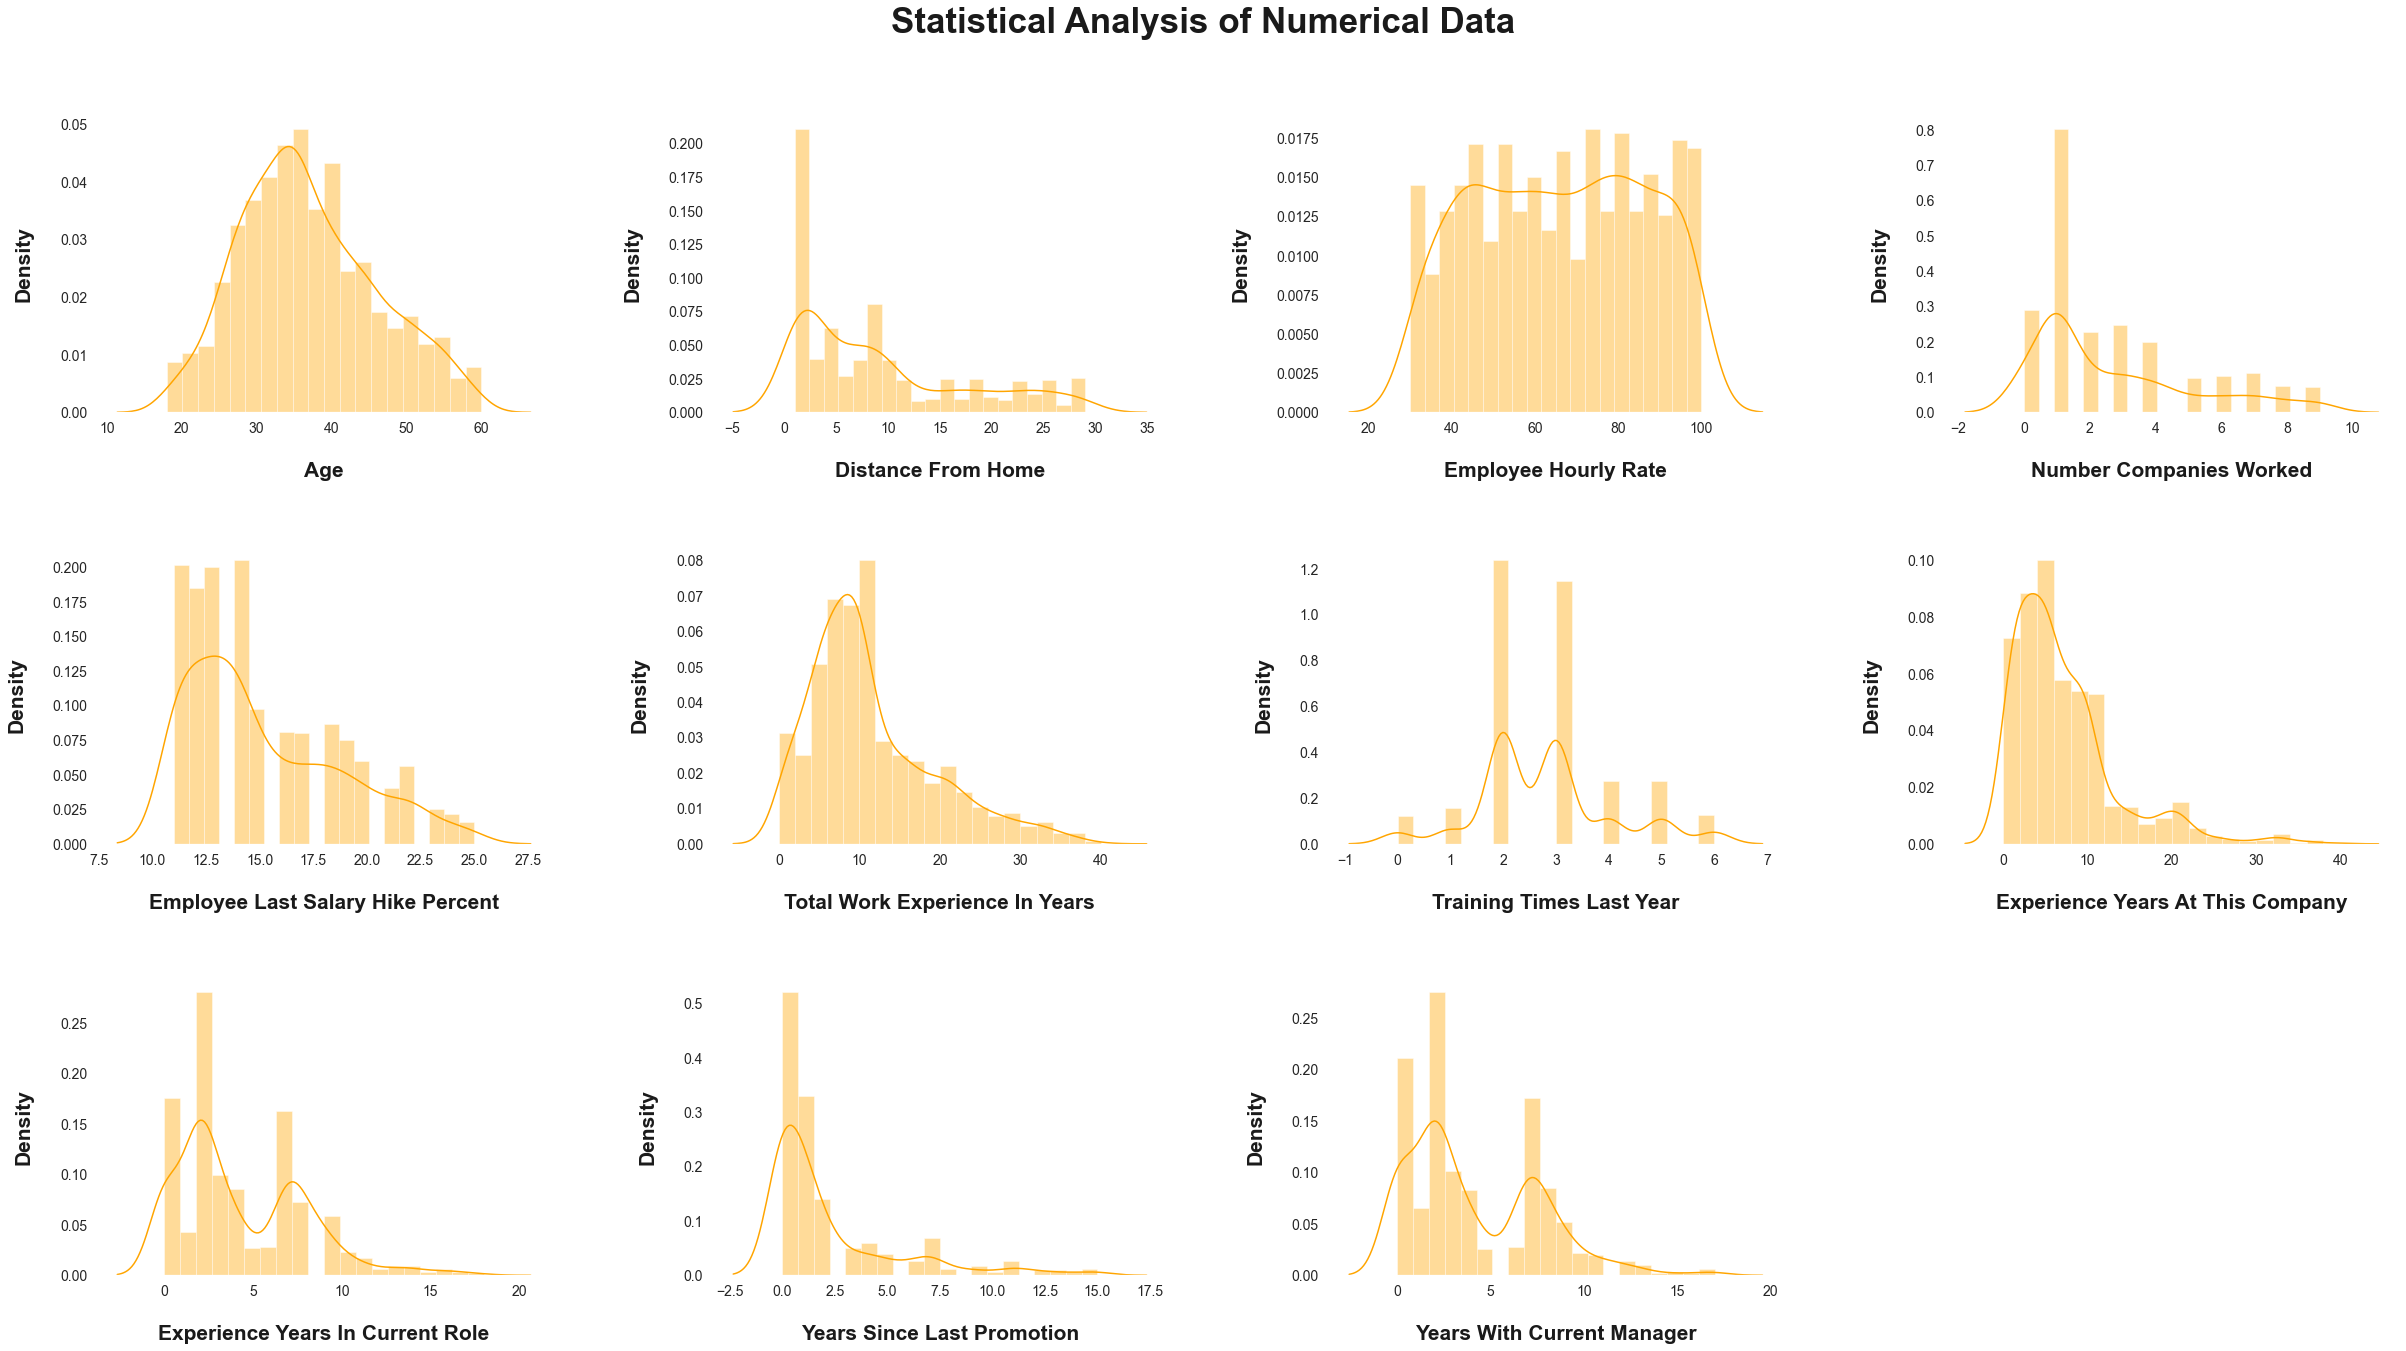

In [12]:
sns.set(rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":21,"xtick.labelsize":14,"ytick.labelsize":14,
            "legend.fontsize":14,'axes.grid' : False,'axes.facecolor': 'white'})

fig1 = plt.figure(figsize=(35,25))
fig1.suptitle("Statistical Analysis of Numerical Data", fontsize=35,fontweight="bold",color="k")
for index,col in enumerate(num_data):
    plt.subplot(4,4,index+1)
    sns.distplot(num_data.loc[:,col].dropna(),kde=True,bins=20,color="orange")
    plt.xlabel(f"\n{col}",fontweight="bold",color="k")
    plt.ylabel("Density\n",fontweight="bold",color="k")
fig1.tight_layout(pad=4.0)
fig1.subplots_adjust(top=0.92)

# Checking Skewness

In [13]:
from scipy.stats import skew, kurtosis
def skewedness(data):
    skewed=[]
    for col in data:
        sk=data[col].skew()
        if(sk>=1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed


print(f"\033[32mSkewed Column name : {skewedness(num_data)}")
print('\033[32mRange of skewness & kurtosis, S < |1.96|')
#Checking Kurtosis
print('\033[32mSkewness for YearsSinceLastPromotion:',skew(df.YearsSinceLastPromotion))
print('\033[32mKurtosis for YearsSinceLastPromotion:',kurtosis(df.YearsSinceLastPromotion))

Skewed Column name : ['Years Since Last Promotion']
Range of skewness & kurtosis, S < |1.96|
Skewness for YearsSinceLastPromotion: 1.9724620367914252
Kurtosis for YearsSinceLastPromotion: 3.5193552691799805


# Skew Visualization

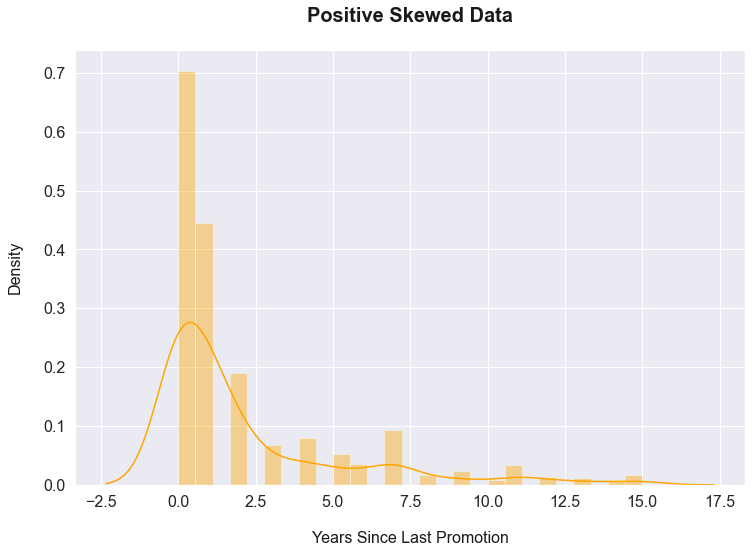

In [17]:
sns.set(rc={"font.size":16,"axes.titlesize":18,"axes.labelsize":16,"xtick.labelsize":16,"ytick.labelsize":16,
            "legend.fontsize":14})
plt.figure(figsize=(12,8))
sns.distplot(num_data['Years Since Last Promotion'],color='orange')
plt.xlabel("\nYears Since Last Promotion",color="k")
plt.ylabel("Density\n",color="k")
plt.title("Positive Skewed Data\n",color="k",fontweight="bold",fontsize="20")
plt.show()

### Applying square root to the skewed column

In [18]:
num_data['Years Since Last Promotion'] = np.sqrt(num_data['Years Since Last Promotion'])

In [19]:
print(f"\033[32m{num_data['Years Since Last Promotion'].skew()}")

0.7350121906940618


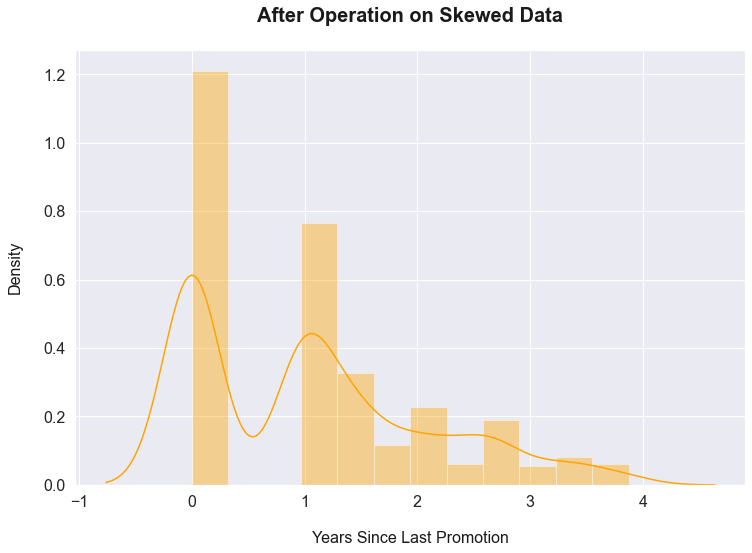

In [20]:
sns.set(rc={"font.size":16,"axes.titlesize":18,"axes.labelsize":16,"xtick.labelsize":16,"ytick.labelsize":16,
            "legend.fontsize":14})
plt.figure(figsize=(12,8))
sns.distplot(num_data['Years Since Last Promotion'],color='orange')
plt.xlabel("\nYears Since Last Promotion",color="k")
plt.ylabel("Density\n",color="k")
plt.title("After Operation on Skewed Data\n",color="k",fontweight="bold",fontsize=20)
plt.show()

# Statistical Analysis of Ordinal Data

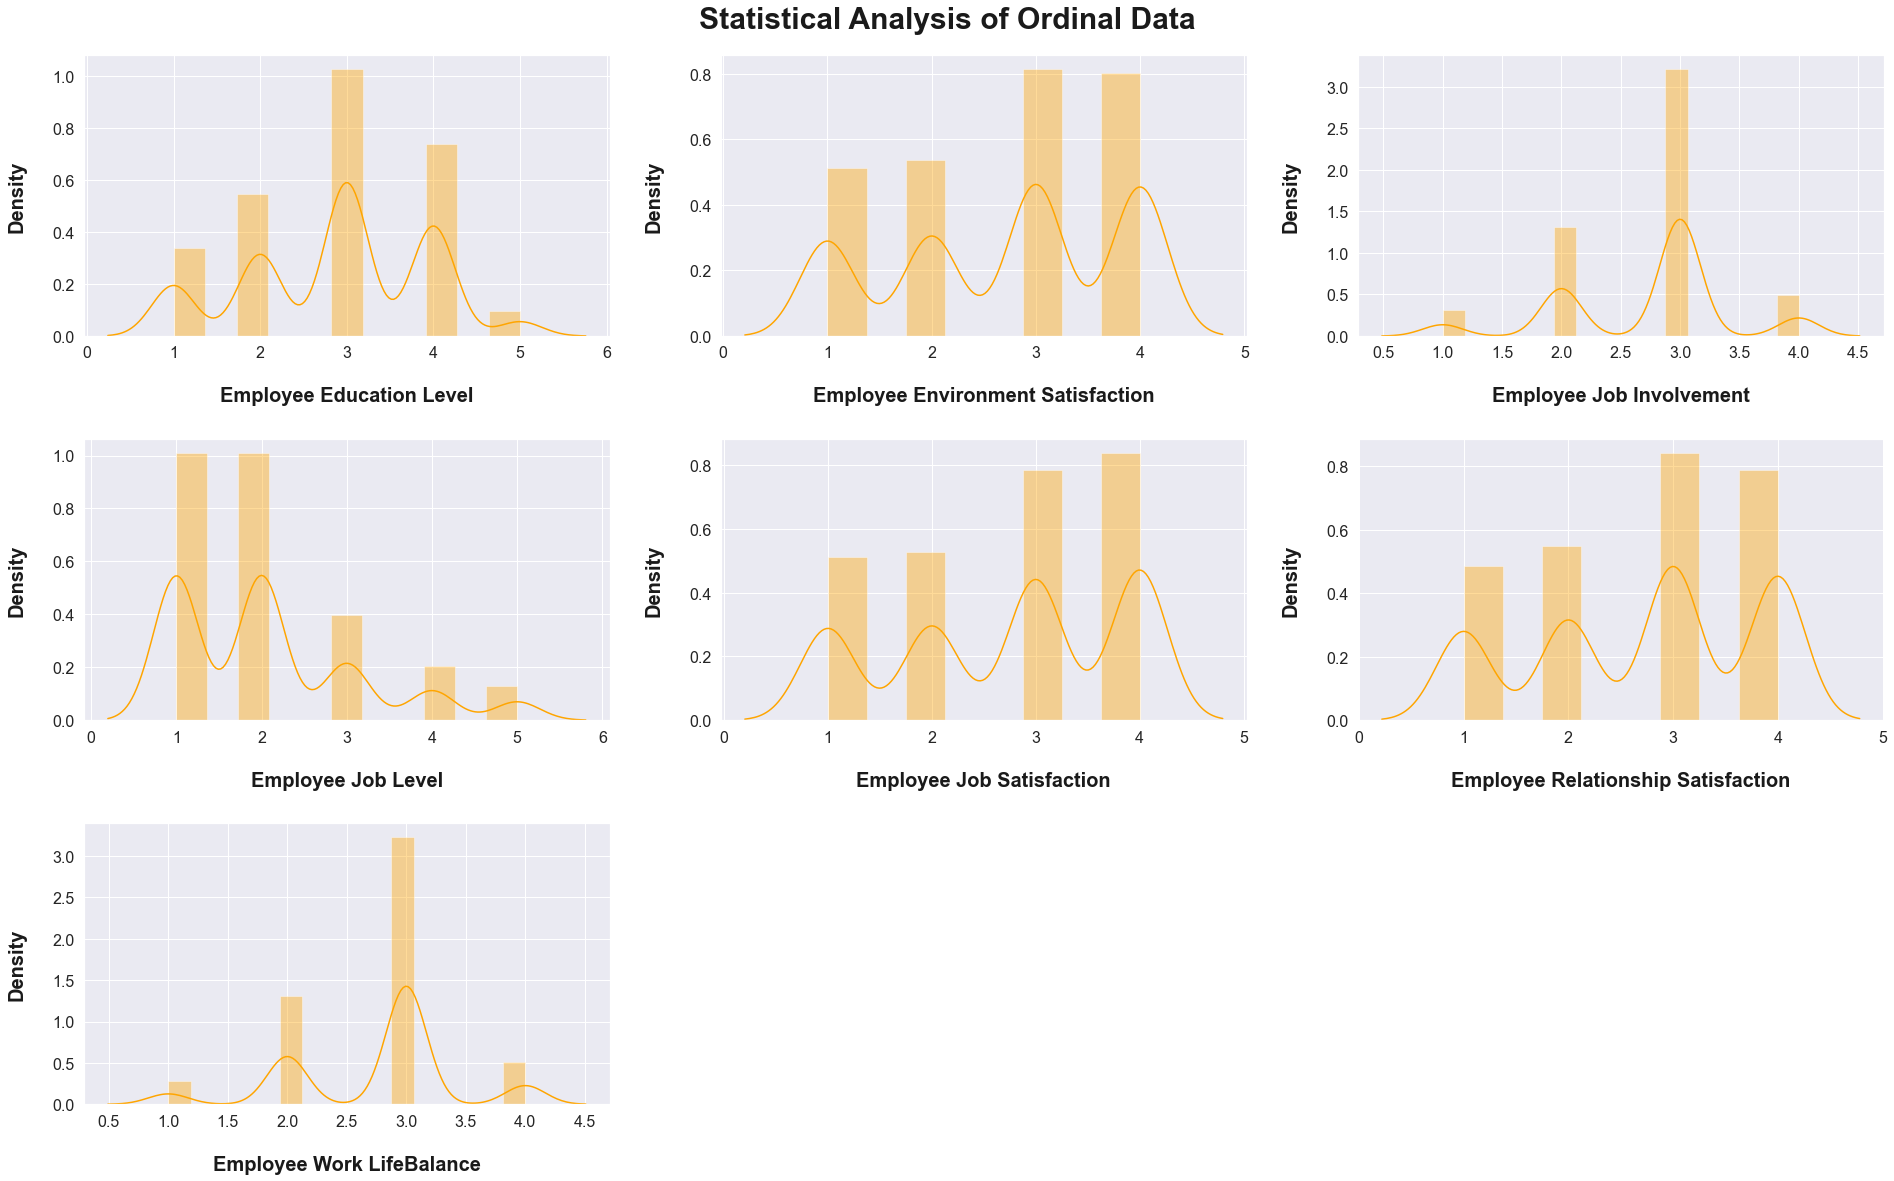

In [23]:
ord_data = df[['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
'EmpRelationshipSatisfaction','EmpWorkLifeBalance']]

ord_data.columns = ['Employee Education Level','Employee Environment Satisfaction','Employee Job Involvement','Employee Job Level','Employee Job Satisfaction',
'Employee Relationship Satisfaction','Employee Work LifeBalance']

fig = plt.figure(figsize=(27,17))
fig.suptitle("Statistical Analysis of Ordinal Data", fontsize=30,fontweight="bold",color="k")

for index,cols in enumerate(ord_data):
    plt.subplot(3,3,index+1)
    sns.distplot(ord_data.loc[:,cols],color="orange")
    plt.xlabel(f'\n{cols}',color="k",fontsize=20,fontweight="bold")
    plt.ylabel(f'Density\n',color="k",fontsize=20,fontweight="bold")
plt.tight_layout(pad=2)
fig.subplots_adjust(top=0.94)

### Storing Object type data in obj_variable data

In [24]:
obj_data = df.select_dtypes(include="object")
print(f"\033[32m{obj_data.columns}")

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'],
      dtype='object')


### Changing the Column Name

In [25]:
obj_data.columns = ['Gender', 'Education Background', 'Marital Status', 'Employees Department',
       'Employees Job Role', 'Business Travel Frequency', 'Over Time', 'Attrition']
obj_data

,Gender,Education Background,Marital Status,Employees Department,Employees Job Role,Business Travel Frequency,Over Time,Attrition
EmpNumber,,,,,,,,
E1001000,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
E1001006,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
E1001007,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
E1001009,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
E1001010,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...
E100992,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
E100993,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
E100994,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No


## Combining Numerical, Ordinal & Categorical Data

In [26]:
df_final = pd.concat([num_data,ord_data,obj_data,df['PerformanceRating']], axis=1)
df_final

,Age,Distance From Home,Employee Hourly Rate,Number Companies Worked,Employee Last Salary Hike Percent,Total Work Experience In Years,Training Times Last Year,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,...,Employee Work LifeBalance,Gender,Education Background,Marital Status,Employees Department,Employees Job Role,Business Travel Frequency,Over Time,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,
E1001000,32,10,55,1,12,10,2,10,7,0.000000,...,2,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No,3
E1001006,47,14,42,2,12,20,2,7,7,1.000000,...,3,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No,3
E1001007,40,5,48,5,21,20,2,18,13,1.000000,...,3,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No,4
E1001009,41,10,73,3,15,23,2,21,6,3.464102,...,2,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No,3
E1001010,60,16,84,8,14,10,1,2,2,1.414214,...,3,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E100992,27,3,71,1,20,6,3,6,5,0.000000,...,3,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No,4
E100993,37,10,80,3,17,4,2,1,0,0.000000,...,3,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No,3
E100994,50,28,74,1,11,20,3,20,8,1.732051,...,3,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No,3


### Converting Labeled Data into Numerical Data

In [28]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df_final[['Gender', 'Education Background', 'Marital Status','Employees Department', 'Employees Job Role',
       'Business Travel Frequency', 'Over Time', 'Attrition']] =df_final[['Gender', 'Education Background', 
       'Marital Status','Employees Department', 'Employees Job Role','Business Travel Frequency', 'Over Time', 'Attrition']].apply(label.fit_transform)

* Defining independent variable and dependent variable.

In [29]:
X = df_final.iloc[:,:-1]
y = df_final.iloc[:,-1]

## Correlation with Target Variable

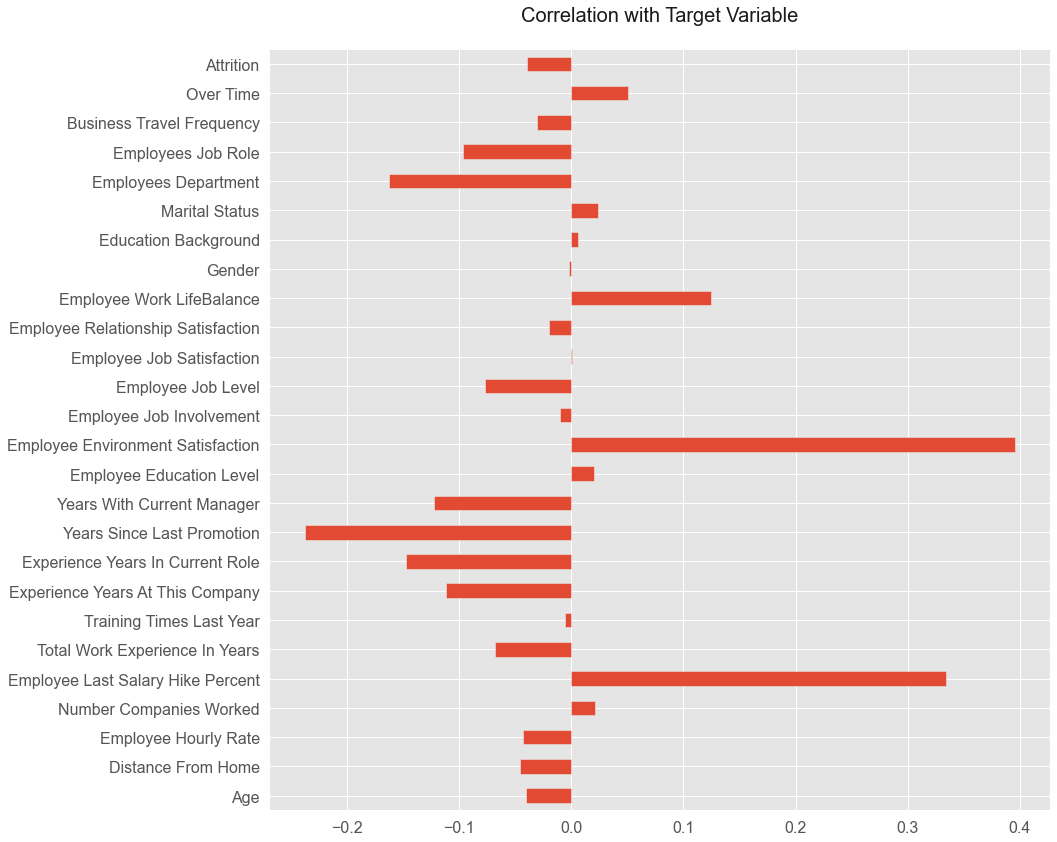

In [32]:
plt.style.use('ggplot')
ax = X.corrwith(y).plot(kind='barh', grid=True, figsize=(14,14))
plt.title("Correlation with Target Variable\n", size=20,color="k")
plt.xticks(size=16)
plt.yticks(size=16)
ax.xaxis.label.set_color('k')
ax.yaxis.label.set_color('k')
plt.show()

## Using RandomOverSampler Technique

In [33]:
print(f"\033[32m{y.value_counts()}")

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64


In [35]:
from imblearn.over_sampling import RandomOverSampler,SMOTENC,SMOTE
oversampling = RandomOverSampler()
X_over, y_over = oversampling.fit_resample(X,y)
X_over = pd.DataFrame(X_over)
X_over.columns = ['Age', 'Distance From Home', 'Employee Hourly Rate',
       'Number Companies Worked', 'Employee Last Salary Hike Percent',
       'Total Work Experience In Years', 'Training Times Last Year',
       'Experience Years At This Company', 'Experience Years In Current Role',
       'Years Since Last Promotion', 'Years With Current Manager',
       'Employee Education Level', 'Employee Environment Satisfaction',
       'Employee Job Involvement', 'Employee Job Level',
       'Employee Job Satisfaction', 'Employee Relationship Satisfaction',
       'Employee Work LifeBalance', 'Gender', 'Education Background',
       'Marital Status', 'Employees Department', 'Employees Job Role',
       'Business Travel Frequency', 'Over Time', 'Attrition']
print(f"\033[32m{y_over.value_counts()}")

2    874
4    874
3    874
Name: PerformanceRating, dtype: int64


In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2,k=15)
fit = bestfeatures.fit(X_over,y_over)

scoresdf = pd.DataFrame(fit.scores_)
columnsdf = pd.DataFrame(X_over.columns)

featurescores = pd.concat([columnsdf,scoresdf],axis=1)
featurescores.columns = ['feature_names','Scores']

print(f"\033[32m{featurescores.nlargest(5,'Scores')}")

                        feature_names       Scores
4   Employee Last Salary Hike Percent  1295.796891
12  Employee Environment Satisfaction   464.430384
7    Experience Years At This Company   311.062150
8    Experience Years In Current Role   310.504189
9          Years Since Last Promotion   301.035120
